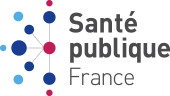

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Objectif
* Trouver une idée d’application : sélection des variables pertinentes
* Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)
* Automatisant des traitements.
* Tests hypothèses et analyses exploratoires
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
* Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


# Sommaire
**Données**
- Compréhension des données

In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0,E
1,"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0,E
2,"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0,B
3,"!, Gummie Flower",0.00,47.50,1255.0,72.50,0.00,0.0,5.00,0.06350,13.0,D
4,"!, Halloween Mix Whole Wheat Cookies",30.00,25.00,2301.0,55.00,20.00,5.0,5.00,0.82550,19.0,E
...,...,...,...,...,...,...,...,...,...,...,...
112989,"Zweigle's, Hot Dog Sauce",0.00,20.00,418.0,26.67,0.00,0.0,0.00,2.54000,15.0,D
112990,Zwieback - Rusk,5.26,15.79,1540.0,78.95,2.63,5.3,10.53,0.73406,7.0,C
112991,Zwieback Snack Toast,5.00,10.00,1674.0,60.00,0.00,10.0,10.00,1.27000,6.0,C
112992,"Zymbom, Energy Drink With Taurine",0.00,10.80,184.0,11.20,0.00,0.0,0.40,0.20320,2.0,B


# Les  données
## Compréhension des données
Chargement des 4 fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(),shape et describe()**

<img src='./oc_logo.png' width=15px /> Afficher les 5 premières lignes du dataframe `df`.

In [4]:
df.head(3)

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0,E
1,"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0,E
2,"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0,B


In [5]:
df.describe()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000
mean,12.029515,17.107087,1144.296463,35.336524,4.241426,2.427976,6.851555,1.768504,9.455339
std,16.118110,21.949690,771.327282,29.684162,7.002032,4.291831,8.132915,6.499003,8.723027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,0.000000,1.180000,412.854167,7.140000,0.000000,0.000000,0.000000,0.068580,1.000000
50%,5.000000,6.670000,1197.000000,27.270000,0.755000,0.700000,4.350000,0.635000,10.000000
75%,20.000000,26.670000,1674.000000,62.134375,6.250000,3.300000,10.000000,1.470660,16.000000
max,100.000000,100.000000,3766.000000,100.000000,100.000000,100.000000,100.000000,99.905820,37.000000


In [6]:
df.columns

Index(['product_name', 'fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112994 entries, 0 to 112993
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             112994 non-null  object 
 1   fat_100g                 112994 non-null  float64
 2   sugars_100g              112994 non-null  float64
 3   energy_100g              112994 non-null  float64
 4   carbohydrates_100g       112994 non-null  float64
 5   saturated-fat_100g       112994 non-null  float64
 6   fiber_100g               112994 non-null  float64
 7   proteins_100g            112994 non-null  float64
 8   salt_100g                112994 non-null  float64
 9   nutrition-score-fr_100g  112994 non-null  float64
 10  nutrition_grade_fr       112994 non-null  object 
dtypes: float64(9), object(2)
memory usage: 9.5+ MB


### Analyse Univariée


In [43]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

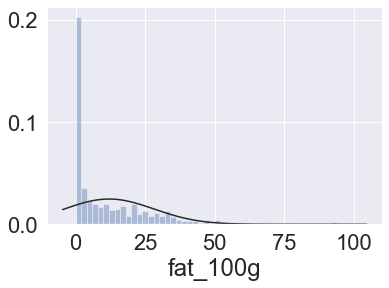

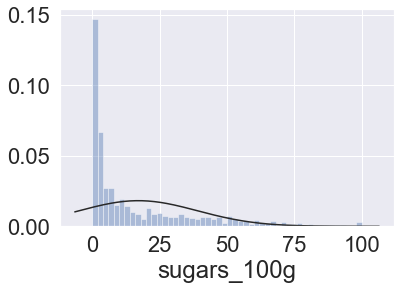

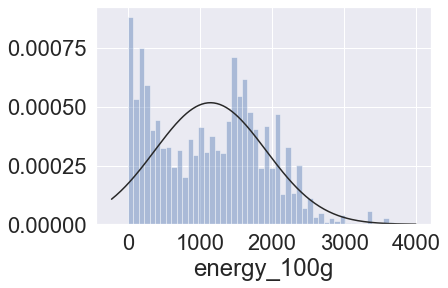

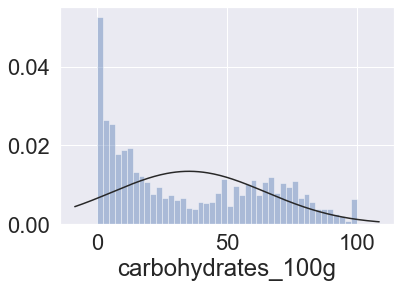

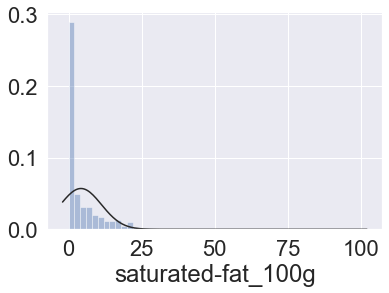

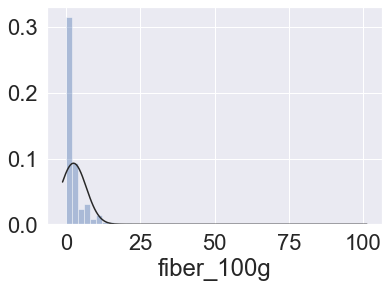

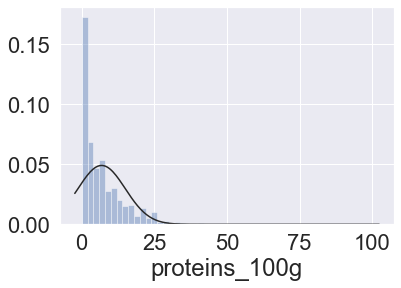

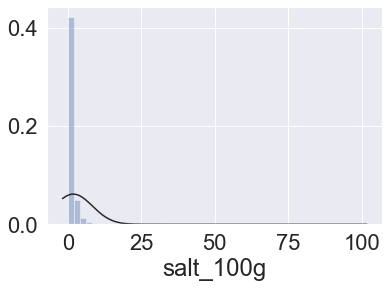

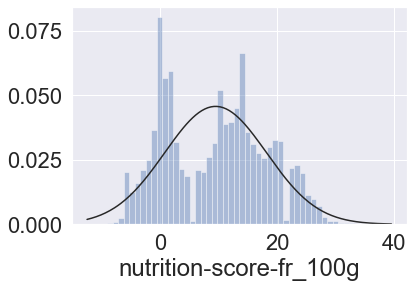

In [44]:
#distplot
for col in df.select_dtypes('number'):
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

fat_100g


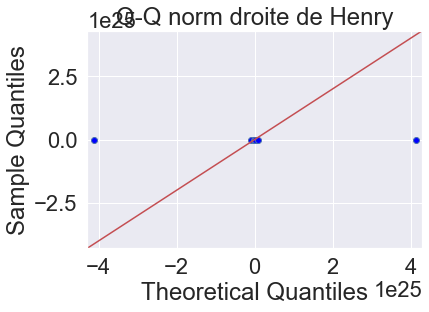

sugars_100g


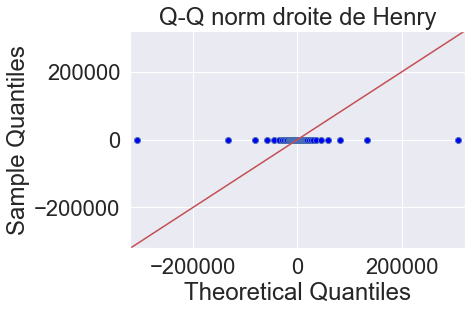

energy_100g


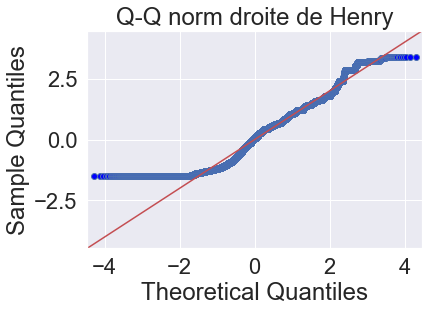

carbohydrates_100g


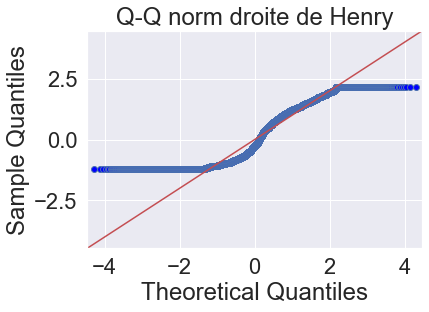

saturated-fat_100g


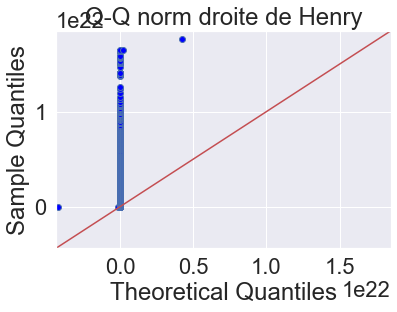

fiber_100g


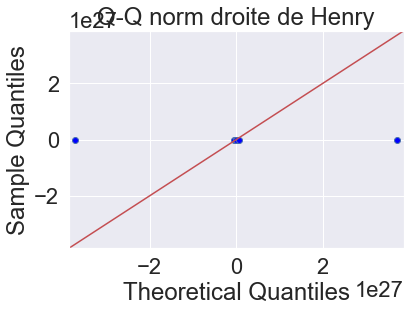

proteins_100g


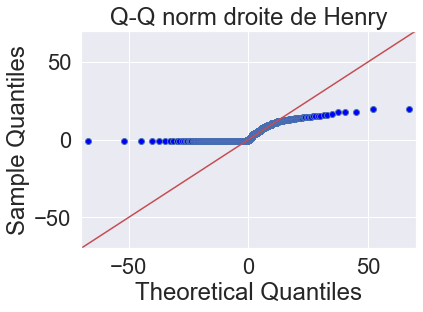

salt_100g


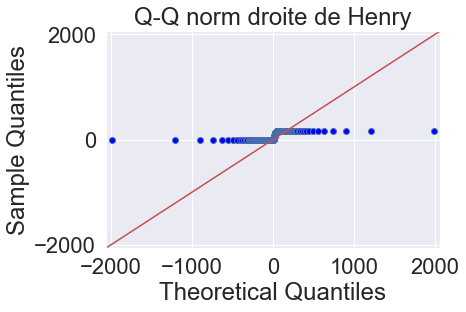

nutrition-score-fr_100g


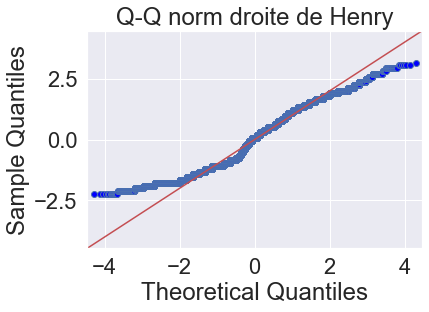

In [46]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

### Analyse Bivariée

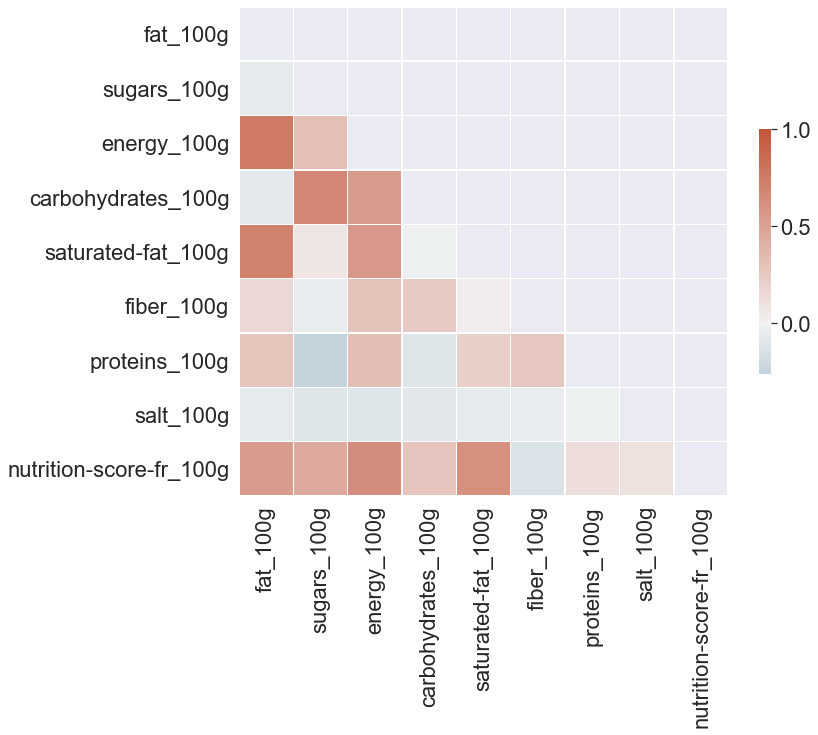

In [49]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
sns.pairplot(df, hue="nutrition_grade_fr")

KeyboardInterrupt: 

#### Nutrition grade _ fat_100g

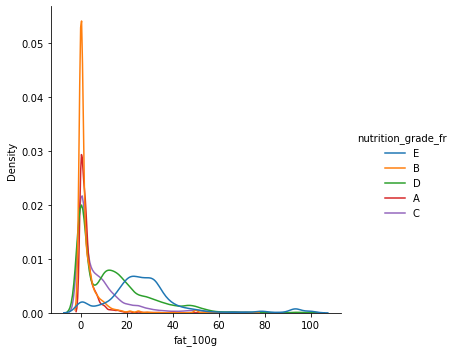

In [8]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

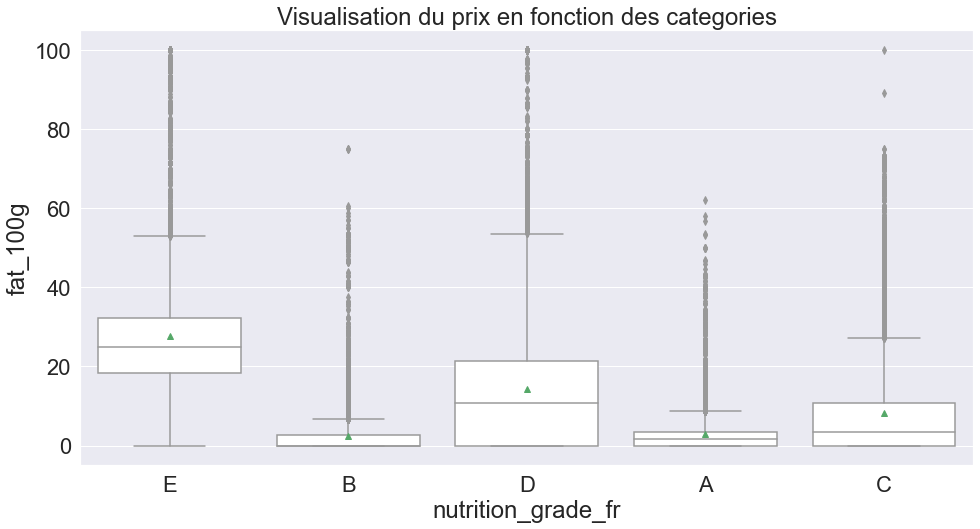

In [9]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ sugars_100g

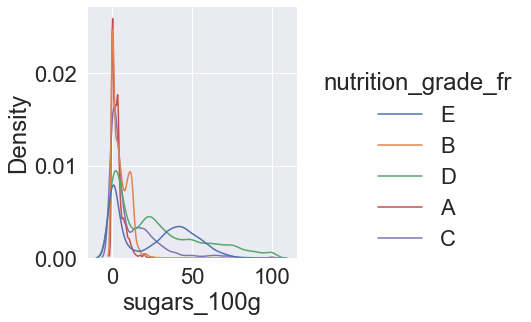

In [10]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

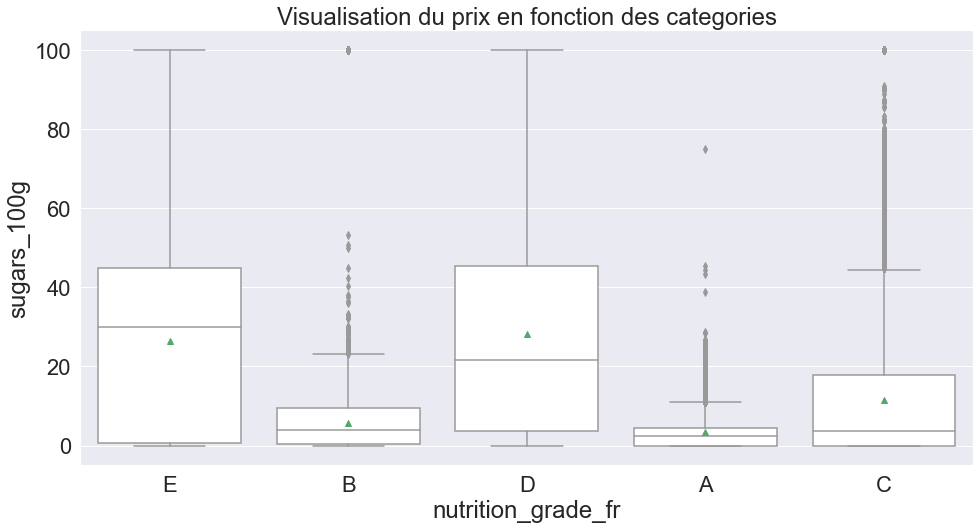

In [11]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ energy_100g

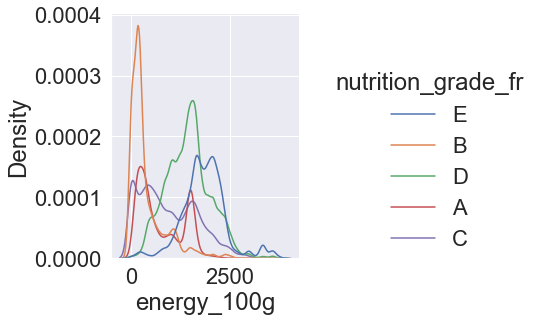

In [12]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

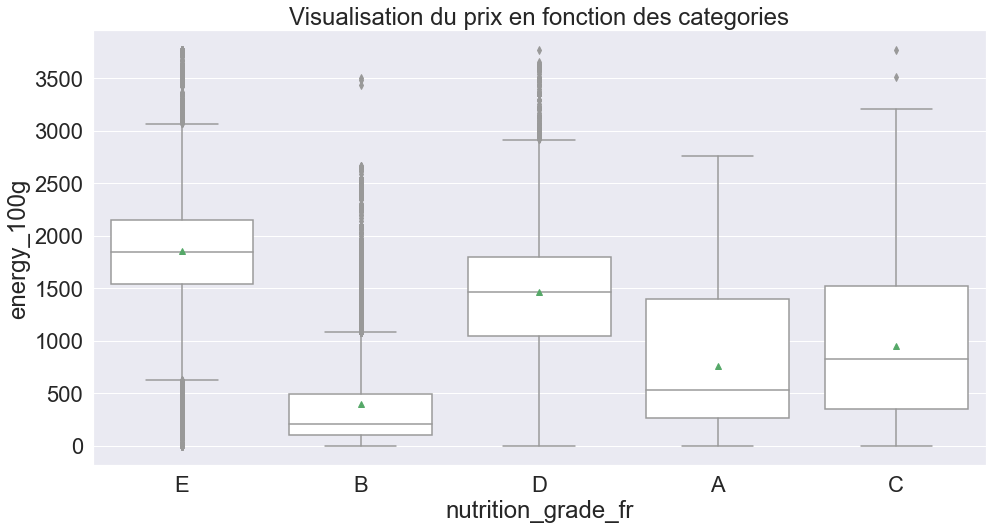

In [13]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ carbohydrates_100g

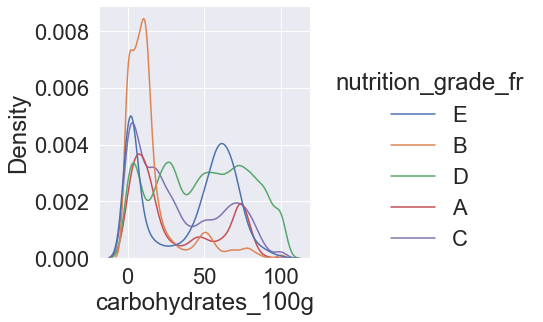

In [14]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

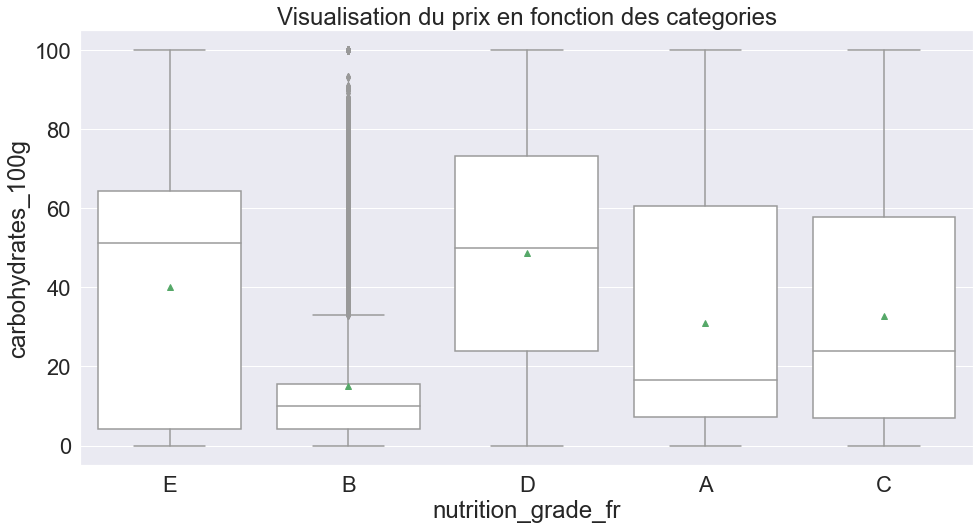

In [15]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ saturated-fat_100g

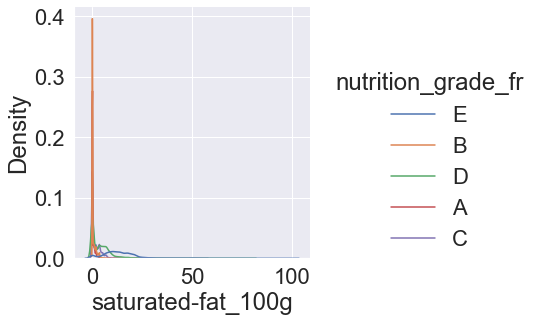

In [16]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

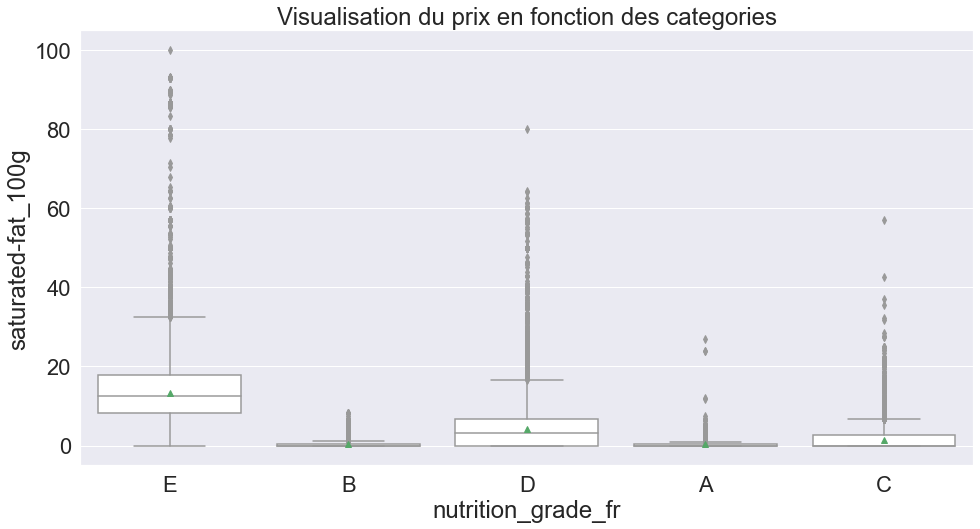

In [17]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ fiber_100g 

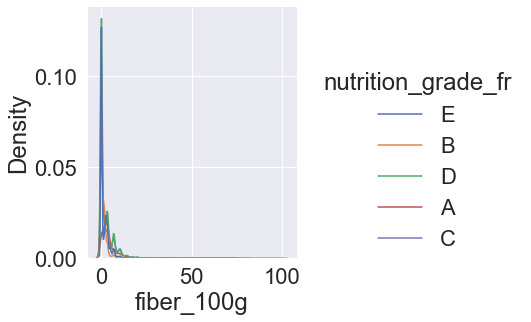

In [18]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

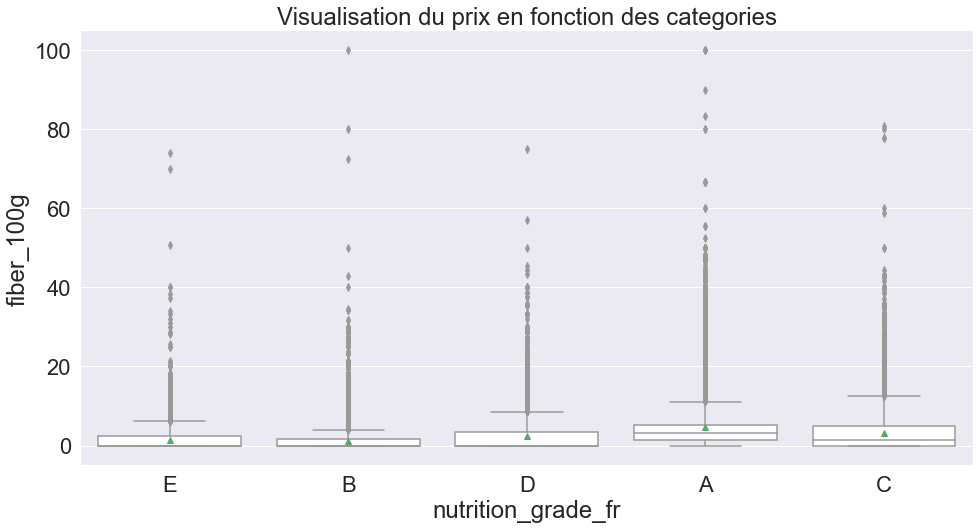

In [19]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ proteins_100g   

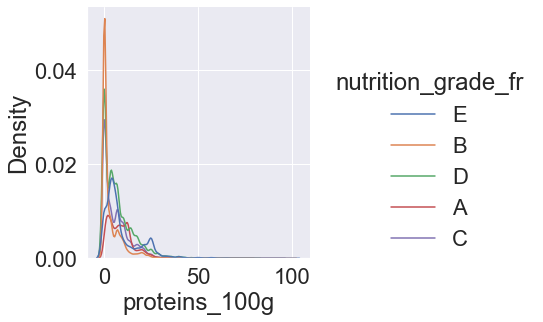

In [20]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

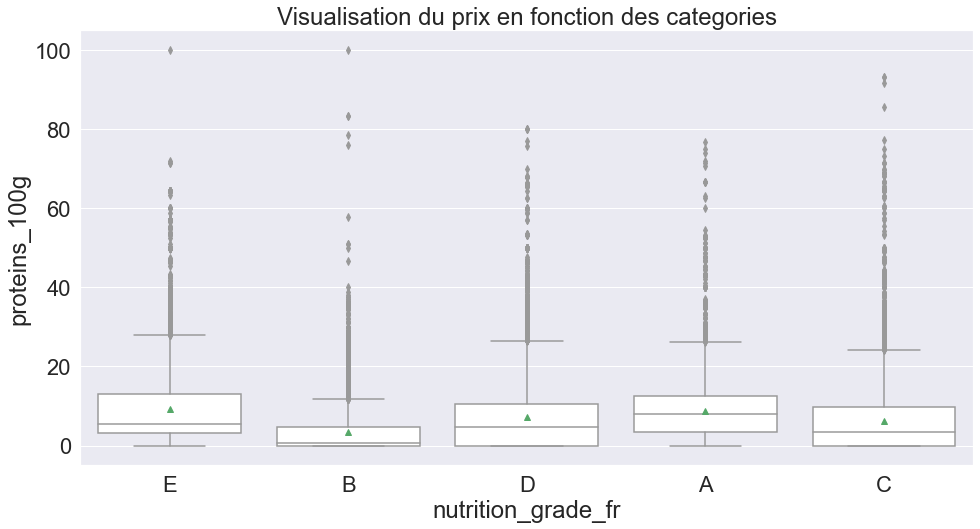

In [21]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ salt_100g 

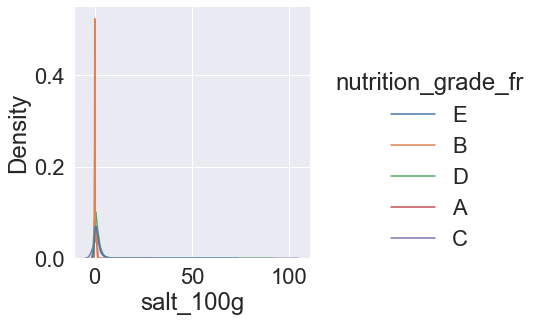

In [22]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

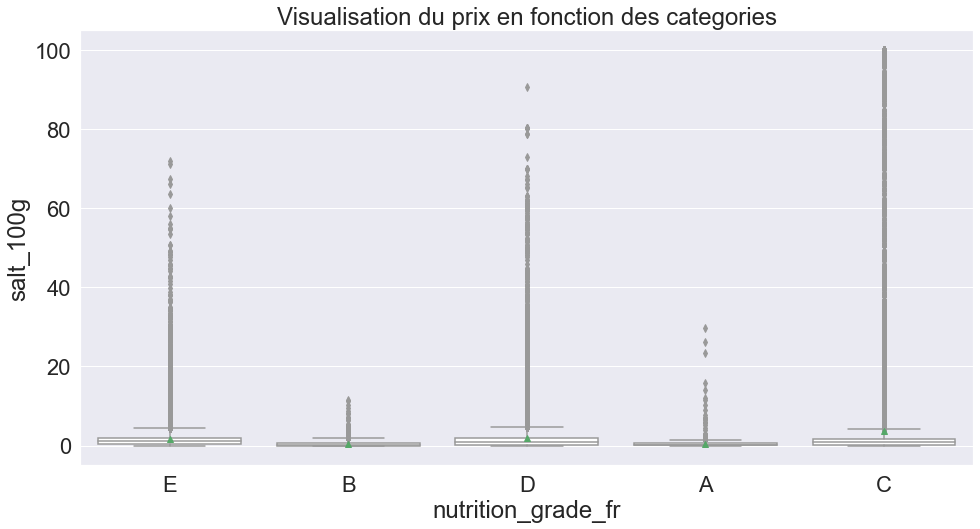

In [23]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

#### Nutrition grade _ nutrition-score-fr_100g

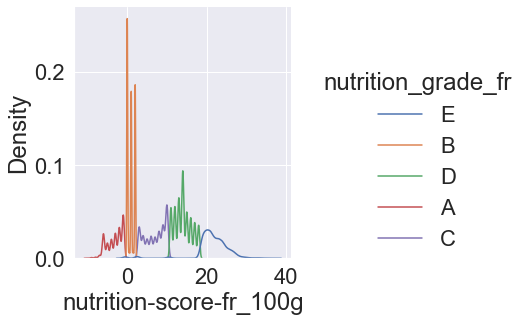

In [24]:
sns.displot(data=df, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

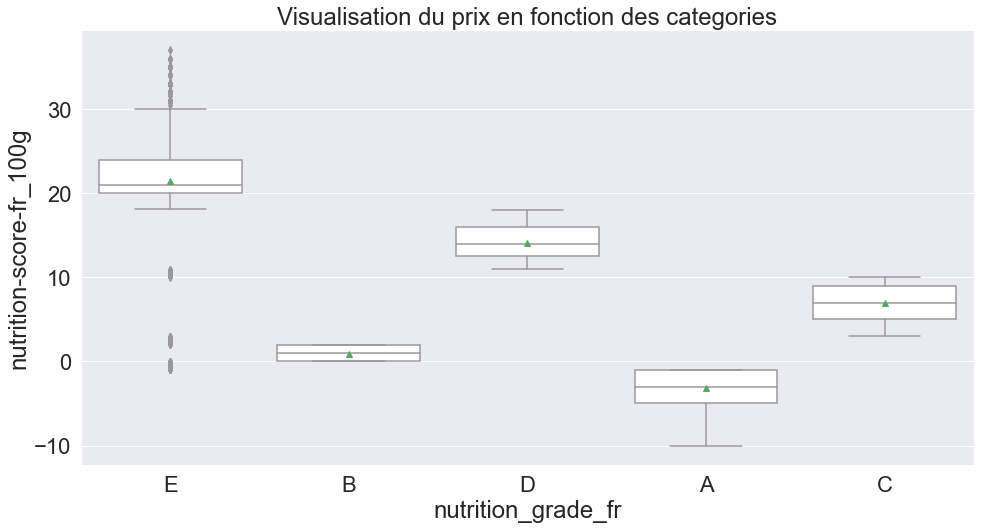

In [25]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation du prix en fonction des categories")
plt.show()

## Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [ ]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables age d'un client et la catégorie des livres achetés sont indépendantes
# Ha: l'hypothèse alternative: Les variables age d'un client et la catégorie des livres achetés sont corrélées

In [ ]:
linear_model = ols('age ~ C(categ)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

Test non parametrique Kruskal-Wallis (moins puissant que l'ANOVA mais plus robuste)

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables age d'un client et la catégorie des livres achetés sont indépendantes
# Ha: l'hypothèse alternative: Les variables age d'un client et la catégorie des livres achetés sont corrélées

In [ ]:
# Kruskal-Wallis
kstat, pval = stats.kruskal(categ0, categ1, categ2)
pval
0.0

In [ ]:
seuil = 0.05
# Conclusion
if pval > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

### Analyse en Composantes Principales 

<img src='./oc_logo.png' width=15px /> L'ACP est sensible à la présence de valeurs extrêmes, pour simplifier l'analyse, supprimer les 200 locations ayant les loyers les plus élevés. *C'est d'autant plus logique car nous souhaitons trouver une nouvelle façon de synthétiser les caractéristiques communes à la majorité des données, des valeurs extrêmes véhiculent à l'inverse des caractéristiques inhabituelles.*

In [ ]:
loc_df = loc_df.sort_values('prix').iloc[:-200, :]

<img src='./oc_logo.png' width=15px /> Extrayez les variables `nb_mois_en_activite`, `note_moyenne`, `capacite_accueil` et `prix`. Puis standardisez ces variables avec `StandardScaler` de sklearn.

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from functions import *

acp_vars = ['nb_mois_en_activite', 'note_moyenne', 'capacite_accueil', 'prix']
X = loc_df[acp_vars].dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

<img src='./oc_logo.png' width=15px /> Effectuez une ACP et affichez l'éboulis des valeurs propres.

In [ ]:
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)

<img src='./oc_logo.png' width=15px /> Affichez le cercle des corrélations des deux premières composantes.

In [ ]:
pcs = pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))

<img src='./oc_logo.png' width=15px /> Projetez les points sur les deux premières composantes, puis isolez les valeurs par quartier et colorez par catégories de prix. Indice : utilisez `relplot` de Seaborn.

In [ ]:
acp_df = pd.DataFrame(X)
acp_df['categories_prix'] = loc_df.loc[keep_ind, 'categories_prix']
acp_df['categories_note'] = loc_df.loc[keep_ind, 'categories_note']
acp_df['quartier'] = loc_df.loc[keep_ind, 'quartier']

In [ ]:
plt.figure(figsize=(7, 7))
sns.relplot(data=acp_df, x=1, y=2, col='quartier', col_wrap=4, hue='categories_prix');